# Принятие решений в бизнесе

**Цель проекта**

Целью данного проекта является приоритизация гипотез для увеличения выручки интернет-магазина с помощью фреймворков ICE и RICE, а также анализ результатов A/B-теста для принятия решения о его продолжении или завершении.

**Описание данных**

**hypothesis.csv:**
- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**orders.csv:**

- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.

**visitors.csv:**

- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

## Содержание работы:

1) [Предобработка данных](#1)

2) [Исследовательский анализ данных](#2)

3) [Анализ A/B теста](#3)

4) [Выводы](#4)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
hypo = pd.read_csv('hypothesis.csv')
order = pd.read_csv('orders.csv')
visit = pd.read_csv('visitors.csv')
pd.options.display.max_colwidth = 120

## Предобработка данных <a id="1"></a>

In [3]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypo.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [5]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
order.sample(10)

,transactionId,visitorId,date,revenue,group
1037,4149581711,1555048873,2019-08-31,1830,B
716,972407388,237748145,2019-08-27,470,A
964,3018088287,3600436937,2019-08-10,1730,B
197,2632798290,2716752286,2019-08-02,2220,A
286,3508803238,3117119809,2019-08-24,19260,A
187,2048878902,4256040402,2019-08-17,1550,A
232,2883105032,3086835579,2019-08-23,2646,A
1024,3845118557,1964413493,2019-08-31,160,B
927,31060183,710690947,2019-08-30,870,B
63,4049927765,343208965,2019-08-16,1350,A


In [7]:
order.columns = ['transactionid', 'visitorid', 'date', 'revenue', 'group']

In [8]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visit.sample(10)

,date,group,visitors
61,2019-08-31,B,718
25,2019-08-26,A,722
53,2019-08-23,B,546
28,2019-08-29,A,577
55,2019-08-25,B,679
8,2019-08-09,A,617
23,2019-08-24,A,395
45,2019-08-15,B,544
52,2019-08-22,B,650
51,2019-08-21,B,656


In [10]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visit['date'] = pd.to_datetime(visit['date'])
order['date'] = pd.to_datetime(order['date'])

**ВЫВОД:** в данных отсутствуют пропуски, форматы данных приведены к необходимым, изменены названия столбцов

In [12]:
display(hypo.duplicated().sum())
display(order.duplicated().sum())
visit.duplicated().sum()

0

0

0

Дубликатов не найдено, все данные приведены к нужным типам, можно приступить к исследовательскому анализу

## EDA<a id="2"></a>

### Часть 1. Приоритизация гипотез.

#### Применим фреймворк ICE для приоритизации гипотез

In [13]:
hypo['ice'] = hypo.impact * hypo.confidence / hypo.efforts
hypo[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Применим фреймворк RICE для приоритизации гипотез

In [14]:
hypo['rice'] = (hypo.reach * hypo.impact * hypo.confidence) / hypo.efforts
hypo[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**ВЫВОД:** при изменении метода приотеризации с ICE на RICE, который учитывает охват, первые 5 гипотез не изменились по составу. Изменился их порядок.

## Анализ A/B-теста<a id="3"></a>

#### 1) Построим график кумулятивной выручки по группам

##### получаем агрегированные кумулятивные по дням данные о заказах

In [15]:
group = order[['date', 'group']].drop_duplicates()
order_group = group.apply(lambda x: order[np.logical_and(order['date'] <= x['date'], order['group'] == x['group'])]
      .agg({'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',}), axis=1,).sort_values(by=['date', 'group'])
order_group.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


##### получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [16]:
visit_group = group.apply(lambda x: visit[np.logical_and(visit['date'] <= x['date'], visit['group'] == x['group'])]
    .agg({'date': 'max', 
          'group': 'max', 
          'visitors': 'sum'}),axis=1,).sort_values(by=['date', 'group'])
visit_group.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


##### объединяем кумулятивные данные в одной таблице

In [17]:
cumulative_data = order_group.merge(visit_group, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'order', 'buyer', 'revenue', 'visit']
cumulative_data['o_b'] = cumulative_data.order/cumulative_data.visit
display(order_group)
visit_group

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


##### строим графики выручки

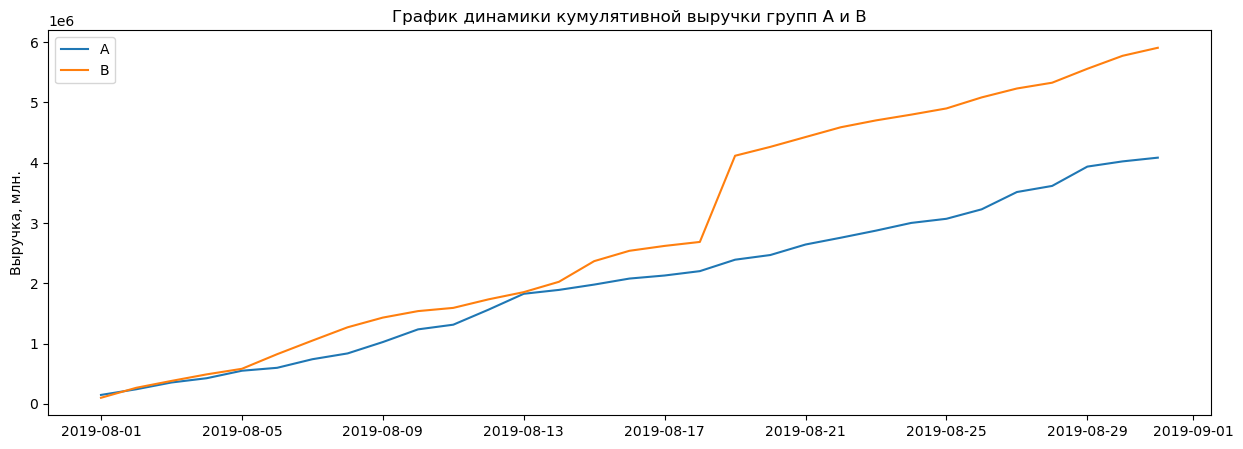

In [18]:
import matplotlib.pyplot as plt
cummulativeRevenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'order','buyer']]
cummulativeRevenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'order','buyer']]
plt.figure(figsize=(15,5))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.title('График динамики кумулятивной выручки групп А и В')
plt.ylabel("Выручка, млн.")
plt.legend();


**ВЫВОД:** из графика видно, что кумулятивная выручка группы B стабильно выше выручки группы А, и более того, с 18 по 19 августа наблюдается резкое повышение кумулятивной вырочки в группе В. Это может объясняться ростом количества или качества заказов.

#### 2) Построим график кумулятивного среднего чека по группам

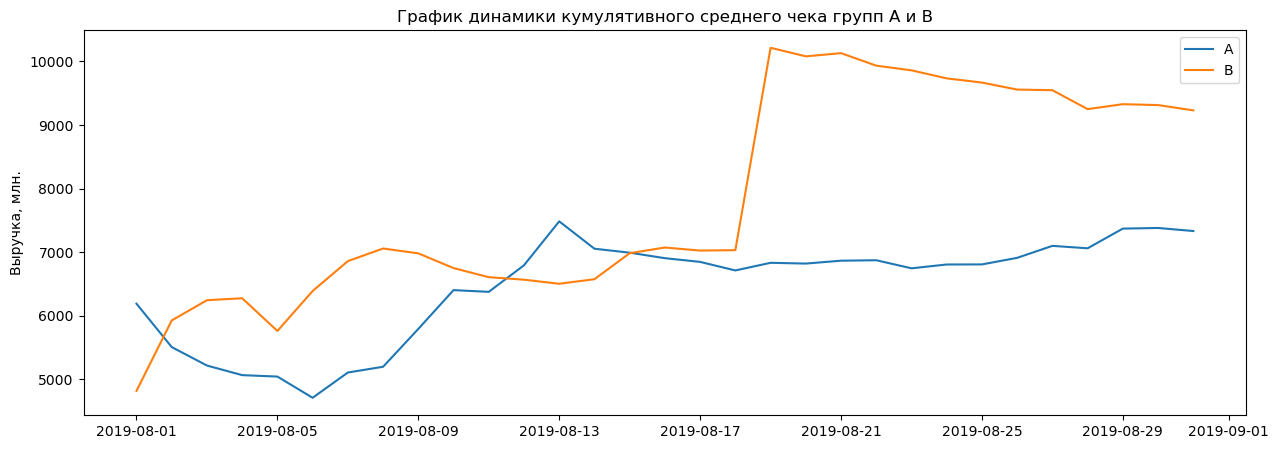

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'] / cummulativeRevenueA['order'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'] / cummulativeRevenueB['order'], label='B')
plt.title('График динамики кумулятивного среднего чека групп А и В')
plt.ylabel("Выручка, млн.")
plt.legend()
plt.show()

**ВЫВОД:** такой резкий скачок в выручке скорее всего сигнализирует о выбросе

#### 3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A

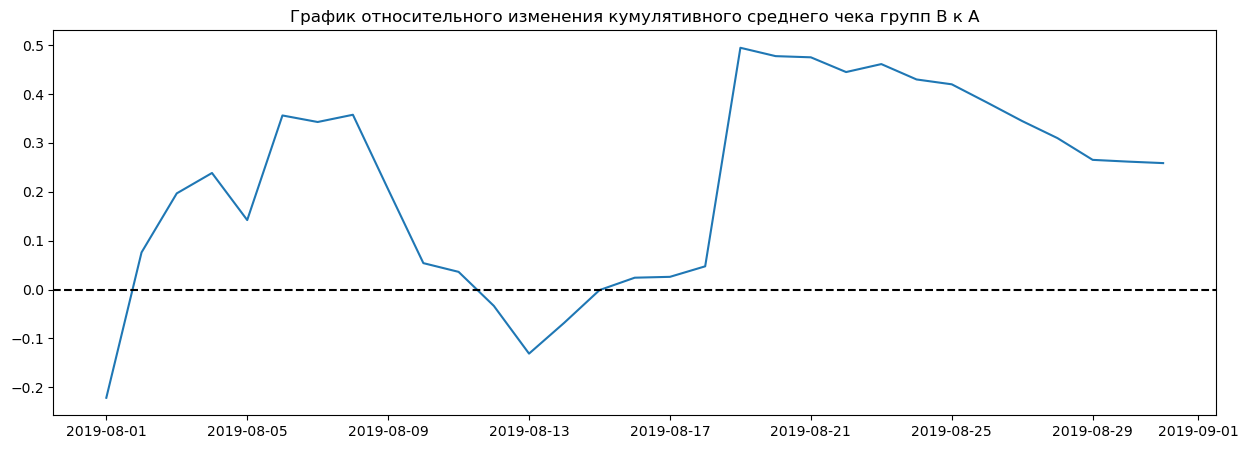

In [20]:
cumulativeRevenueAB = cummulativeRevenueA.merge(cummulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['_a', '_b'])
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueAB['date'], 
         (cumulativeRevenueAB['revenue_b']/cumulativeRevenueAB['order_b'])/
         (cumulativeRevenueAB['revenue_a']/cumulativeRevenueAB['order_a'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека групп B к A')
plt.show()

**ВЫВОД:** на графике явно выделяются две моды и прослеживается нелинейнось изменения. В данных имеются выбросы.

#### 4) Построим график кумулятивного среднего количества заказов на посетителя по группам

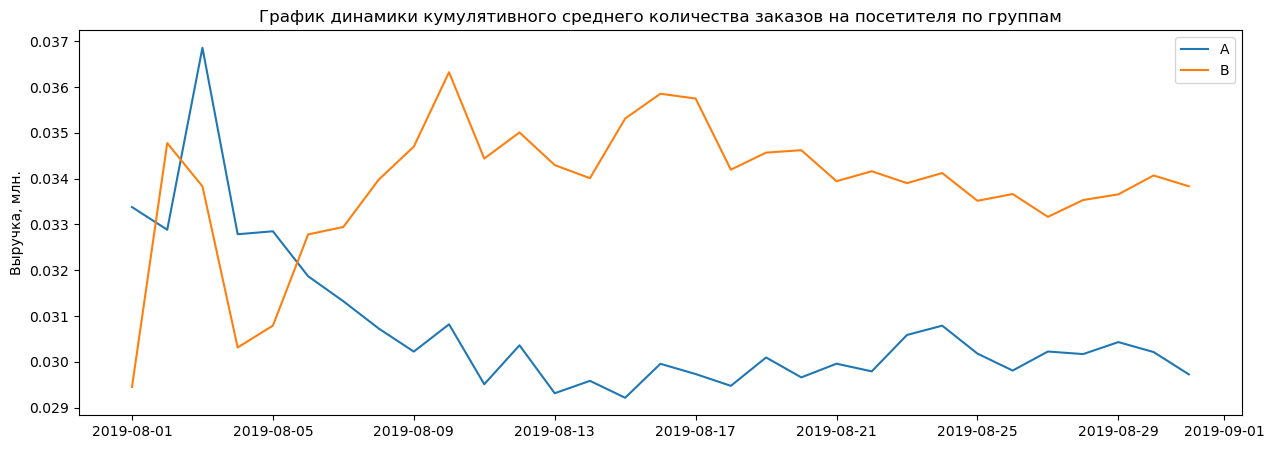

In [21]:
cummulativeRevenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'order', 'o_b']]
cummulativeRevenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'order', 'o_b']]
plt.figure(figsize=(15,5))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['o_b'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['o_b'], label='B')
plt.title('График динамики кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel("Выручка, млн.")
plt.legend();

**ВЫВОД:** по среднему кол-ву заказов на посетителя группа B так же лидирует как и по остальным метрикам

#### 5) Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

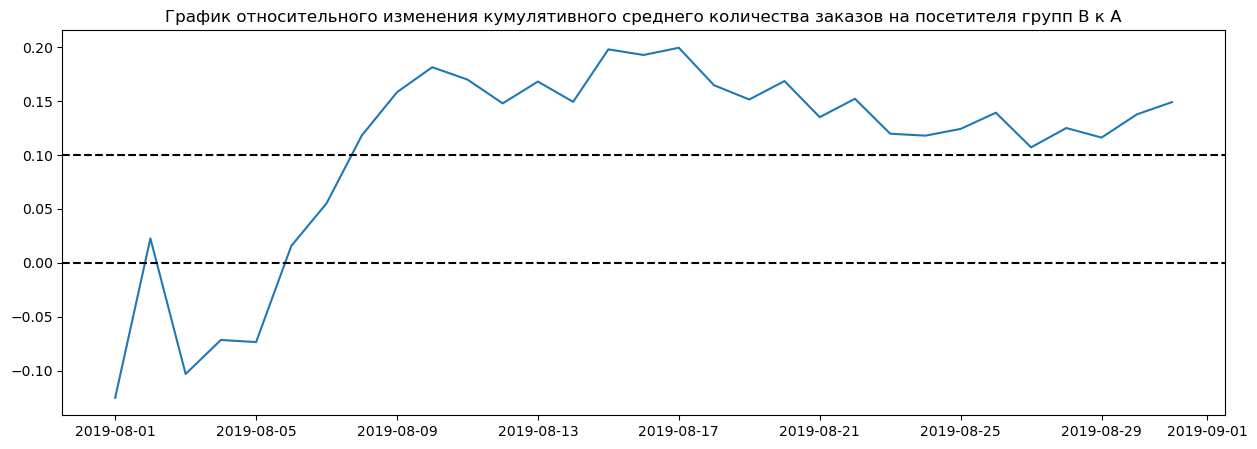

In [22]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, 
                                                     left_on='date',
                                                     right_on='date', 
                                                     how='left', 
                                                     suffixes=['_a', '_b'])
plt.figure(figsize=(15, 5))
plt.plot(mergedCummulativeRevenue['date'], 
         (mergedCummulativeRevenue['order_b'])
         /(mergedCummulativeRevenue['order_a'])-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя групп В к А')
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.1, color='black', linestyle='--');
cumulativeRevenueAB = cummulativeRevenueA.merge(cummulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['_a', '_b'])

**ВЫВОД:** Изначально заказов у пользователей группы А было больше. После 6 августа произошёл всплеск заказов у пользователей группы B


#### 6) Построим точечный график количества заказов по пользователям

In [23]:
orders_by_users = (order.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'}))
orders_by_users.columns =  ['visitorid', 'order']
orders_by_users['order'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: order, dtype: float64

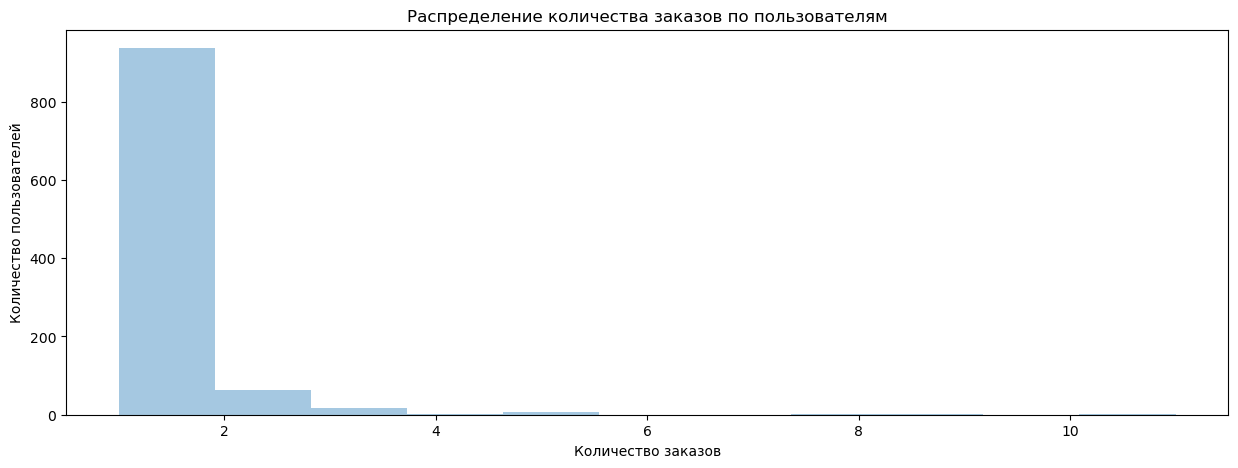

In [24]:
plt.figure(figsize=(15, 5))
plt.hist(orders_by_users['order'], alpha=0.4, bins = 11) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show();

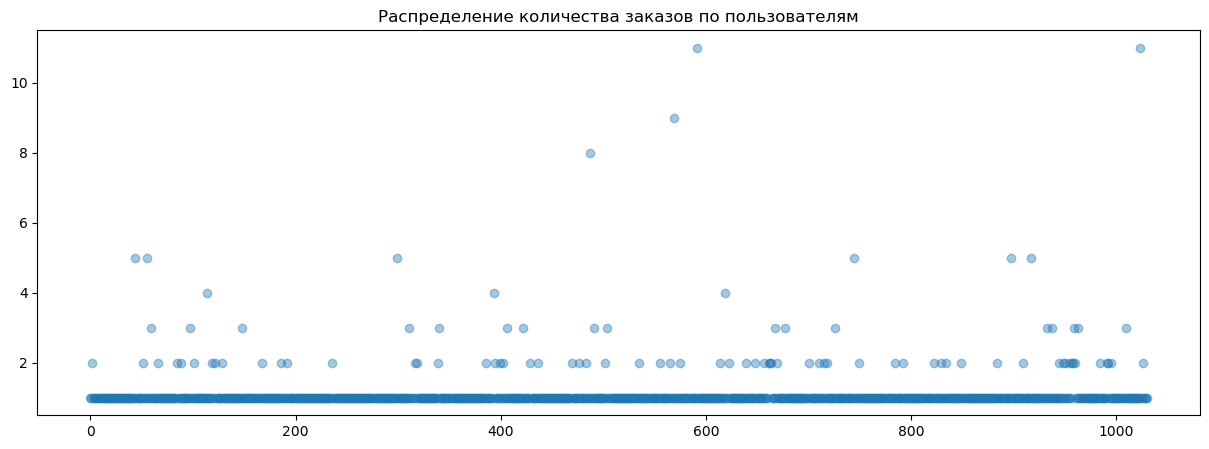

In [25]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['order'], alpha=0.4)
plt.title('Распределение количества заказов по пользователям')
plt.show();

**ВЫВОД:** Большинство пользователей делают 1 заказ, но есть так же значительная доля с 2 и 3-мя заказами.

#### 7) Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [26]:
np.percentile(orders_by_users['order'], [95, 99])

array([2., 4.])

**ВЫВОД:** только 5% пользователей совершили 2 и более покупки, и 1% совершил 4 и более. Примем верхнюю границу 4 заказа на пользователя, а все что больше - будем считать выбросами

#### 8) Построим точечный график стоимостей заказов

In [27]:
order['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

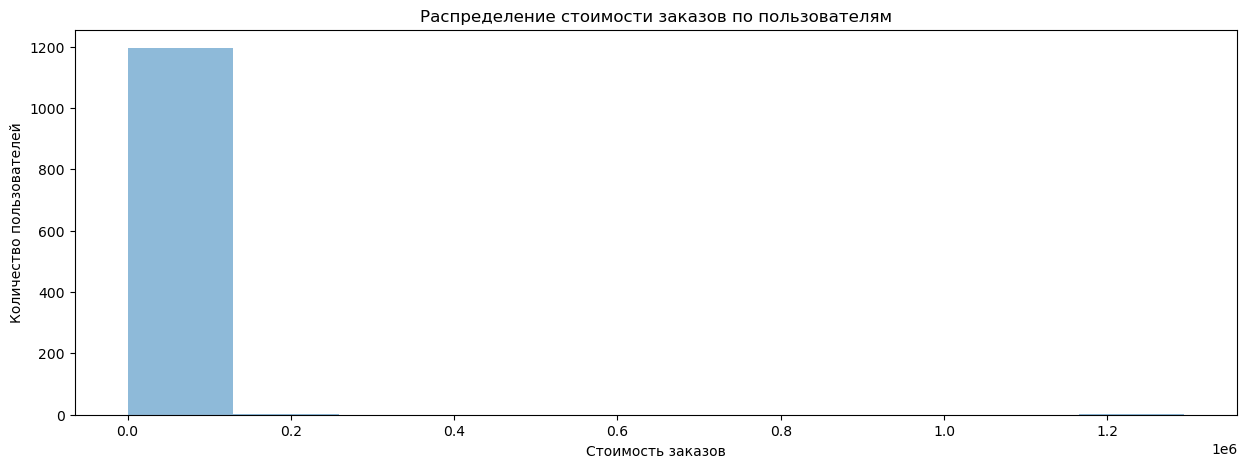

In [28]:
plt.figure(figsize=(15, 5))
plt.hist(order['revenue'], alpha=0.5) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show();

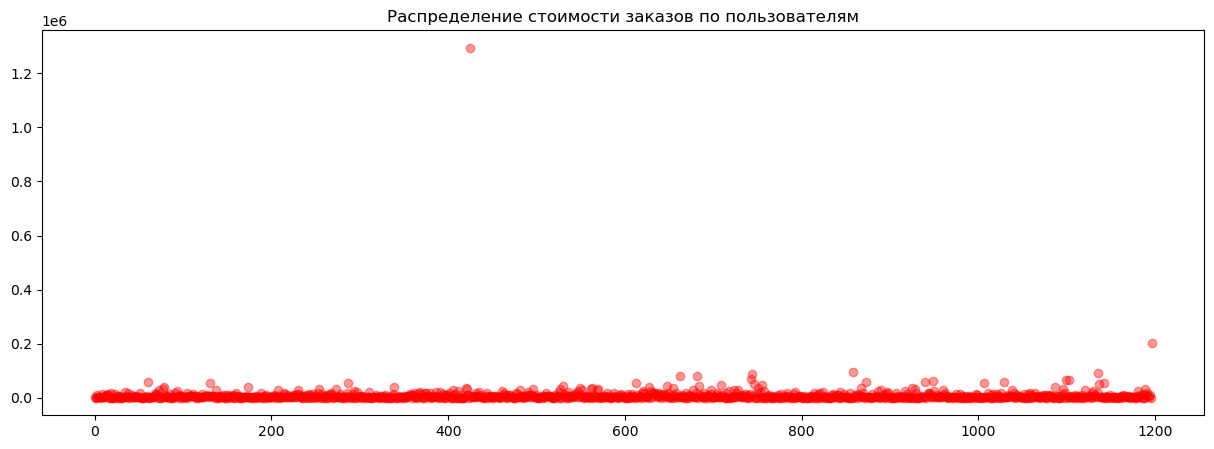

In [29]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(order['revenue'])))
plt.scatter(x_values, order['revenue'], color='red', alpha=0.4)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

**ВЫВОД:** Наблюдаются выбросы, есть очень крупный заказ > 1 млн. Необходимо очистить данные от выбросов

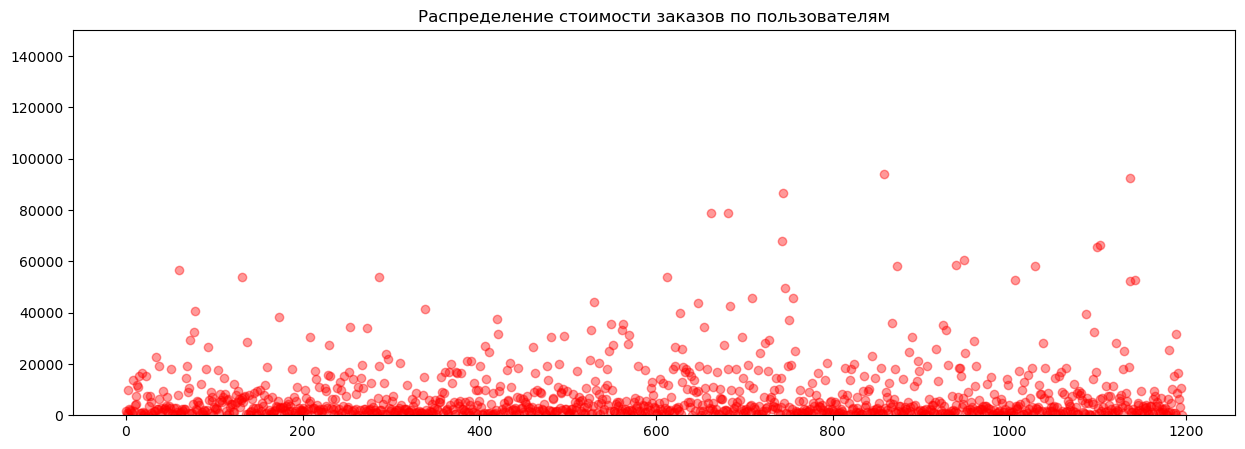

In [30]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(order['revenue'])))
plt.ylim(0, 150000)
plt.scatter(x_values, order['revenue'], color='red', alpha=0.4)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

#### 9) Посчитаем 95-й и 99-й перцентили стоимости заказов

In [31]:
np.percentile(order['revenue'], [95, 99])

array([28000. , 58233.2])

**ВЫВОД:** Определим верхнюю границу по значению 99% перцентиля (58233.2)

#### 10) Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем нулевую и первую гипотезы как: 

**H0: различий в среднем количестве заказов на посетителя между группами нет**

**H1: различия в среднем количестве заказов на посетителя между группами есть**

а уровень значимости 0.05

Подготовим данные к анализу

In [32]:
visitors_daily_a = visit[visit['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visit[visit['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    order[order['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    order[order['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(6)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [33]:
ordersByUsersA = (
    order[order['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersB = (
    order[order['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorid', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series
                     (0, index=np.arange(data['visitors_per_date_a'].sum() 
                                         - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series
                     (0, index=np.arange(data['visitors_per_date_b'].sum() 
                                         - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

0.017
0.138


**ВЫВОД:** p уровень значимости получился  0.017, что меньше чем установленный 0.05, а значит можно отклонить нулевую гипотезу

#### 11) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую и первую гипотезы как: 

**H0: различий в среднем чеке заказа между группами нет**

**H1: различия в среднем чеке заказая между группами есть**

а уровень значимости 0.05

In [34]:
print('{0:.3f}'.format(stats.mannwhitneyu(order[order['group']=='A']['revenue'], order[order['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(order[order['group']=='B']['revenue'].mean()/order[order['group']=='A']['revenue'].mean()-1))

0.729
0.259


**ВЫВОД:** P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

#### 12) Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

"Очистим" данные от выбросов

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orders_by_users['order'], 99)]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orders_by_users['order'], 99)]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = order[order['revenue'] > np.percentile(order['revenue'], 99)]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorid, dtype: int64
15


Всего 15 аномальных пользователей

Определим, как они повлияли на результаты теста

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.014
0.153


**ВЫВОД:** Результат по среднему количеству заказов практически не изменился

#### 13) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [37]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            order[
                np.logical_and(
                    order['group'] == 'A',
                    np.logical_not(order['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            order[
                np.logical_and(
                    order['group'] == 'B',
                    np.logical_not(order['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        order[
            np.logical_and(
                order['group'] == 'B',
                np.logical_not(order['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / order[
            np.logical_and(
                order['group'] == 'A',
                np.logical_not(order['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.851
-0.006


**ВЫВОД:** P-value все так же значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, после очистки средний чек группы B стал незначительно меньше среднего чека группы A.

## ВЫВОДЫ: <a id="4"></a>

Было проведено исследование на основании представленных данных. Исходя из полученных результатов можно дать следующие рекомендации:

1) После применения методов приоретизации гипотез **ICE** и **RICE** было выделено 5 гипотез на которые нужно обратить внимание в 1 очередь:

"Добавить два новых канала привлечения трафика"
"Запустить собственную службу доставки"
"Добавить блоки рекомендаций товаров на сайт"
"Изменить структуру категорий"
"Изменить цвет фона главной страницы"


Есть статистически значимое различие в среднем количестве заказов на посетителя между группами в "сырых" данных и "очищенных".

График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, что результаты группы В стабильно лучше группы А;

Рекомендуется остановить тест, зафиксировав победу группы B (кол-во заказов и средний чек выше)

Вариант B имеет стабильно выше кумулятивную выручку, что может говорить о более положительном пользовательском опыте и/или более высокой конверсии. Так же, такие показатели как средний чек и кол-во заказов лучше у B. Если затраты на внедрение варианта B меньше чем ожидаемый эффект то это целесообразно для увеличения выручки.